In [38]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from matplotlib.patches import Rectangle
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
import warnings 
from skimage.color import rgb2gray
warnings.filterwarnings('ignore')

In [3]:

def rg_chromaticity(patch):
    return (patch[:,:,0]*1.0 / patch.sum(axis=2), 
            patch[:,:,1]*1.0 / patch.sum(axis=2))

def mean_and_std(patch):
    return  np.mean(patch.flatten()), np.std(patch.flatten())

def gaussian(p, mean, std):
    return np.exp(-(p-mean)**2/(2*std**2))*(1/(std*((2*np.pi)**0.5)))


def rg_chromaticity_mask(image, from_row, from_column, 
                         row_width, column_width, 
                         mean_factor=1, std_factor=1):
    #convert to RG space
    image_R = image[:,:,0]*1.0/image.sum(axis=2)
    image_G = image[:,:,1]*1.0/image.sum(axis=2)
    
    #set the patch value
    image_patch = image[from_column:from_column+column_width, 
                        from_row:from_row+row_width]
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    ax[0].imshow(image)
    ax[0].add_patch(Rectangle((from_row, from_column), 
                              row_width, column_width, 
                              linewidth=3,
                              edgecolor='r', facecolor='none'));
    ax[0].set_title('Original image')
    
    #convert patch to RG space
    patch_R, patch_G = rg_chromaticity(image_patch)

    #get the mean and std of patch
    mean_patch_R, std_patch_R = mean_and_std(patch_R)
    mean_patch_G, std_patch_G = mean_and_std(patch_G)
    
    #get the range of colors of the patch
    prob_R = gaussian(image_R, 
                      mean_factor*mean_patch_R, 
                      std_factor*std_patch_R)
    prob_G = gaussian(image_G, 
                      mean_factor*mean_patch_G, 
                      std_factor*std_patch_G)

    #get the mask
    prob = prob_R * prob_G
    
    #clean the mask using area_opening
    mask = area_opening(prob>0.1)
    ax[1].imshow(mask);
    ax[1].set_title('Mask')
    return mask



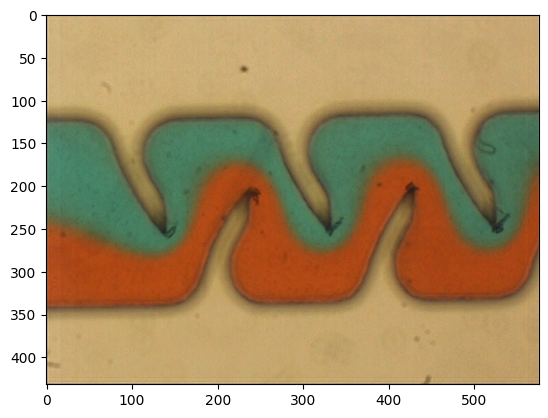

In [6]:
#Load image

img = plt.imread("liquido.jpg")
plt.imshow(img)

(432, 576)

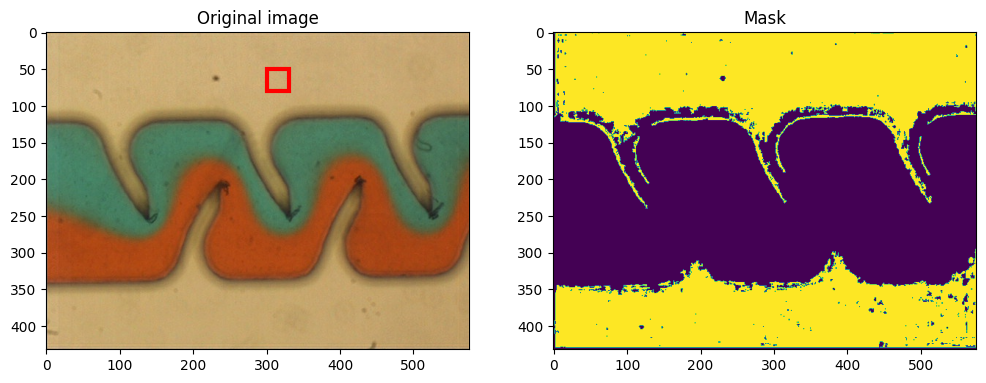

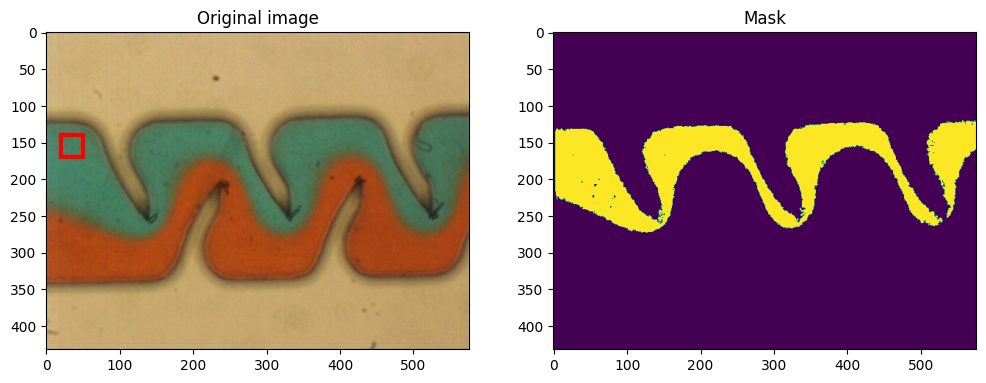

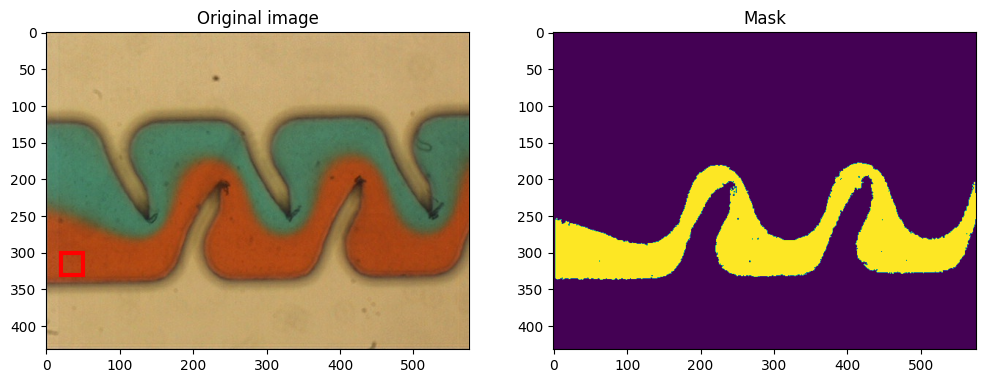

In [35]:

#Generate masks from colors
l_bgMask = rg_chromaticity_mask(img, 300, 50, 30,30)
l_greenMask = rg_chromaticity_mask(img, 20, 140, 30,30)
l_orangeMask = rg_chromaticity_mask(img, 20, 300, 30,30)

l_bgMask.shape

In [54]:
#Obtain images applying bool mask to all image channels
l_imgBG = np.copy(img) 
for i in range (3):
    l_imgBG[:,:,i] = l_imgBG[:,:,i]* l_bgMask.astype(int)


l_imgOrange = np.copy(img) 
for i in range (3):
    l_imgOrange[:,:,i] = l_imgOrange[:,:,i] * l_orangeMask.astype(int)


l_imgGreen = np.copy(img) 
for i in range (3):
    l_imgGreen[:,:,i] = l_imgGreen[:,:,i]* l_greenMask.astype(int)



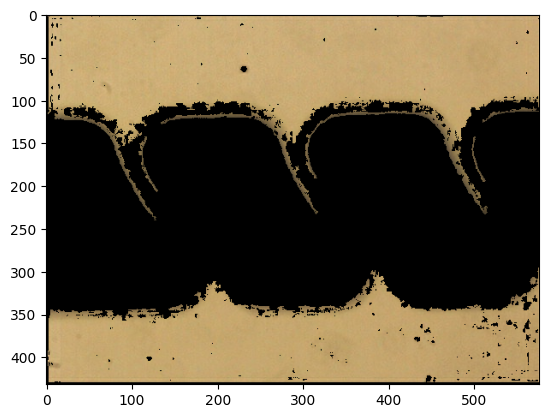

In [50]:
plt.imshow(l_imgBG)

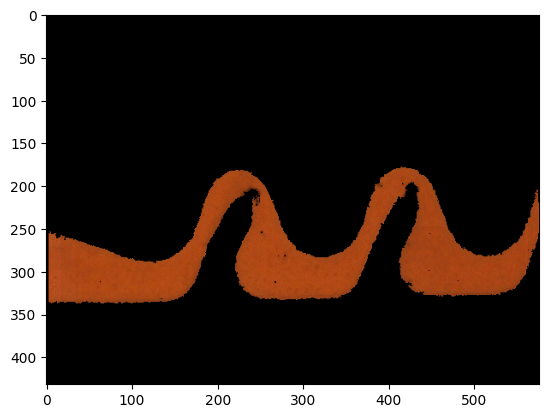

In [51]:
plt.imshow(l_imgOrange, cmap="gray")

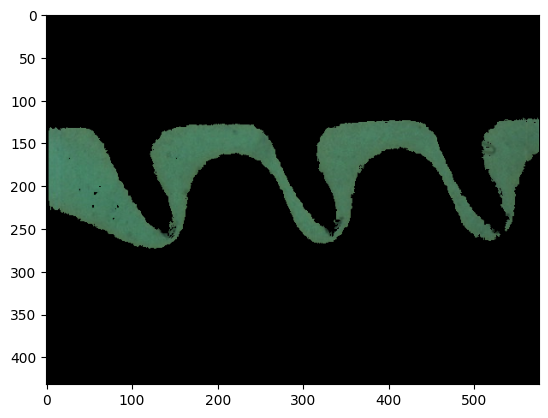

In [52]:
plt.imshow(l_imgGreen, cmap="gray")